<a href="https://colab.research.google.com/github/AhmadAlabrash/Ro-Deep-Learning/blob/main/RO_DL_Balanced_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [242]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [243]:
df = pd.read_csv('/content/Customer-Churn.csv')
df =df.drop(['PaymentMethod','Contract','customerID','gender','MultipleLines','InternetService'],axis=1)
df.fillna(0)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No,Yes,No,No,No,No,Yes,29.85,29.85,No
1,0,No,No,34,Yes,Yes,No,Yes,No,No,No,No,56.95,1889.5,No
2,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Yes,53.85,108.15,Yes
3,0,No,No,45,No,Yes,No,Yes,Yes,No,No,No,42.30,1840.75,No
4,0,No,No,2,Yes,No,No,No,No,No,No,Yes,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,84.80,1990.5,No
7039,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,Yes,103.20,7362.9,No
7040,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Yes,29.60,346.45,No
7041,1,Yes,No,4,Yes,No,No,No,No,No,No,Yes,74.40,306.6,Yes


In [244]:
from sklearn.preprocessing import MinMaxScaler
df.replace({'Yes':1,'No':0,'No internet service':0 ,' ': 0},inplace=True)


In [245]:
df.isnull().sum()

df.dtypes



SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
PaperlessBilling      int64
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [246]:
df.TotalCharges =pd.to_numeric(df.TotalCharges)
df.TotalCharges =df.TotalCharges.astype('f')                 

In [247]:
sa =MinMaxScaler()
df[['TotalCharges','MonthlyCharges','tenure']] =sa.fit_transform(df[['TotalCharges','MonthlyCharges','tenure']])

In [248]:
df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0.013889,0,0,1,0,0,0,0,1,0.115423,0.003437,0
1,0,0,0,0.472222,1,1,0,1,0,0,0,0,0.385075,0.217564,0
2,0,0,0,0.027778,1,1,1,0,0,0,0,1,0.354229,0.012453,1
3,0,0,0,0.625000,0,1,0,1,1,0,0,0,0.239303,0.211951,0
4,0,0,0,0.027778,1,0,0,0,0,0,0,1,0.521891,0.017462,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,0.333333,1,1,0,1,1,1,1,1,0.662189,0.229194,0
7039,0,1,1,1.000000,1,0,1,1,0,1,1,1,0.845274,0.847792,0
7040,0,1,1,0.152778,0,1,0,0,0,0,0,1,0.112935,0.039892,0
7041,1,1,0,0.055556,1,0,0,0,0,0,0,1,0.558706,0.035303,1


In [249]:
df1=df[df['Churn']==1].tenure
df0=df[df['Churn']==0].tenure
df1.shape

(1869,)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([[ 777.,  495.,  401.,  430.,  388.,  386.,  380.,  425.,  455.,
         1037.],
        [ 835.,  264.,  169.,  126.,  107.,  108.,   72.,   70.,   46.,
           72.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 Lists of Patches objects>)

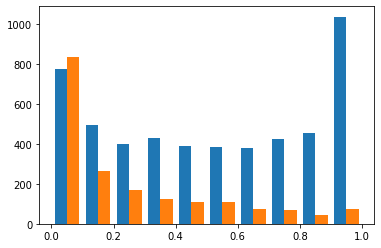

In [250]:
plt.hist([df0,df1])

In [251]:
from sklearn.model_selection import train_test_split
dfx= df.drop('Churn',axis=1)
dfy =df['Churn']
X,x,Y,y =train_test_split(dfx,dfy,train_size=0.8)
x.shape

(1409, 14)

In [252]:
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight
from tensorflow.python import metrics
def ANN(x,y,x_t ,y_t  ,epo,weight):
  model =keras.Sequential([
      keras.layers.Dense(100,input_shape=(14,),activation='relu'),
      keras.layers.Dense(50,activation='relu'),
      keras.layers.Dense(1,activation='sigmoid'),
  ])
  model.compile(
      optimizer ='adam',
      loss='binary_crossentropy',
      metrics =['accuracy']
  )
  if weight == -1 :
   model.fit(x,y,epo)
  else:
   model.fit(x,y,epo,class_weight=weight) 

  ev =model.evaluate(x_t,y_t)
  print(ev) 

  y_pr = model.predict(x_t)
  y_pr = np.round(y_pr)
  cm = confusion_matrix(y_t,y_pr)
  
  plt.figure(figsize=(11,11))
  sns.heatmap(cm ,annot=True)
  
  return ev

45/45 [==============================] - 0s 1ms/step - loss: 0.4933 - accuracy: 0.7473
[0.4933055341243744, 0.7473385334014893]
45/45 [==============================] - 0s 1ms/step


[0.4933055341243744, 0.7473385334014893]

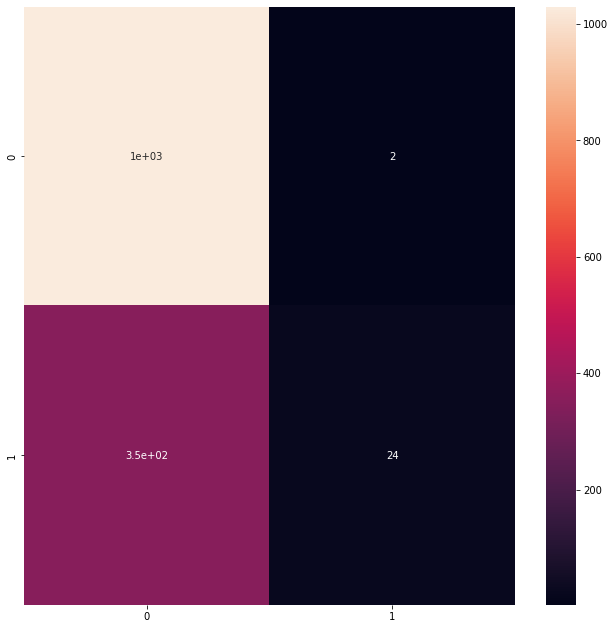

In [253]:
ANN(X,Y,x,y,100,-1)

In [254]:
#Balance our dataset because it have low( churn =1)==>1869  ,  high( churn =0)==> 5174
dfchurn0 =df[df['Churn']==0]
dfchurn1 =df[df['Churn']==1]
dfchurn1.shape

(1869, 15)

24/24 [==============================] - 1s 1ms/step - loss: 0.5873 - accuracy: 0.7273
[0.5873298645019531, 0.7272727489471436]
24/24 [==============================] - 0s 2ms/step


[0.5873298645019531, 0.7272727489471436]

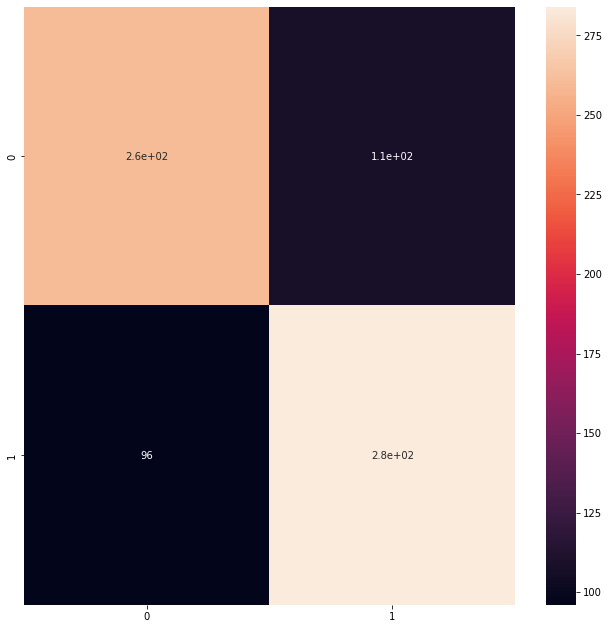

In [255]:
#under sampling lower  churn =0  to 1869
dfchurn0 =dfchurn0.sample(1869)
underSample_df = pd.concat([dfchurn0,dfchurn1])


dfx= underSample_df.drop('Churn',axis=1)
dfy =underSample_df['Churn']
X,x,Y,y =train_test_split(dfx,dfy,train_size=0.8)

ANN(X,Y,x,y,100,-1)

45/45 [==============================] - 0s 2ms/step - loss: 0.4700 - accuracy: 0.7757
[0.4700179100036621, 0.7757274508476257]
45/45 [==============================] - 0s 1ms/step


[0.4700179100036621, 0.7757274508476257]

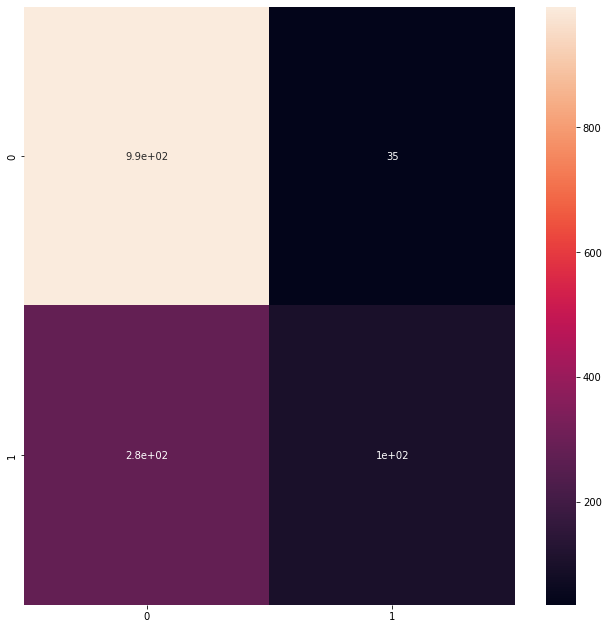

In [256]:
#over sampling higher  churn =1  to 5174
dfchurn0 =df[df['Churn']==0]
dfchurn1 =df[df['Churn']==1]

dfchurn0 =dfchurn0.sample(5174)
overSample_df = pd.concat([dfchurn0,dfchurn1])


dfx= overSample_df.drop('Churn',axis=1)
dfy =overSample_df['Churn']
X,x,Y,y =train_test_split(dfx,dfy,train_size=0.8)

ANN(X,Y,x,y,100,-1)

65/65 [==============================] - 0s 1ms/step - loss: 0.5065 - accuracy: 0.7560
[0.5065396428108215, 0.7560386657714844]
65/65 [==============================] - 0s 1ms/step


[0.5065396428108215, 0.7560386657714844]

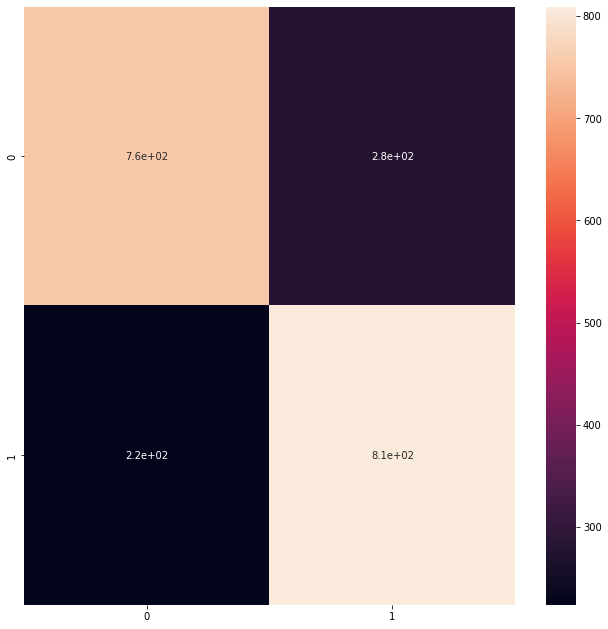

In [266]:
#over sampling SMOTE k-nearst  churn =1  to 5174
from imblearn.over_sampling import SMOTE

dfx= df.drop('Churn',axis=1)
dfy =df['Churn']


sa =SMOTE()
X,Y =sa.fit_resample(dfx,dfy)

X,x,Y,y =train_test_split(X,Y,train_size=0.8)

ANN(X,Y,x,y,100,-1)

45/45 [==============================] - 0s 1ms/step - loss: 0.4835 - accuracy: 0.7608
[0.48352691531181335, 0.7608232498168945]
24/24 [==============================] - 0s 2ms/step - loss: 0.5938 - accuracy: 0.7246
[0.5937803387641907, 0.7245989441871643]
12/12 [==============================] - 0s 2ms/step - loss: 0.2753 - accuracy: 1.0000
[0.2753201723098755, 1.0]
12/12 [==============================] - 1s 2ms/step


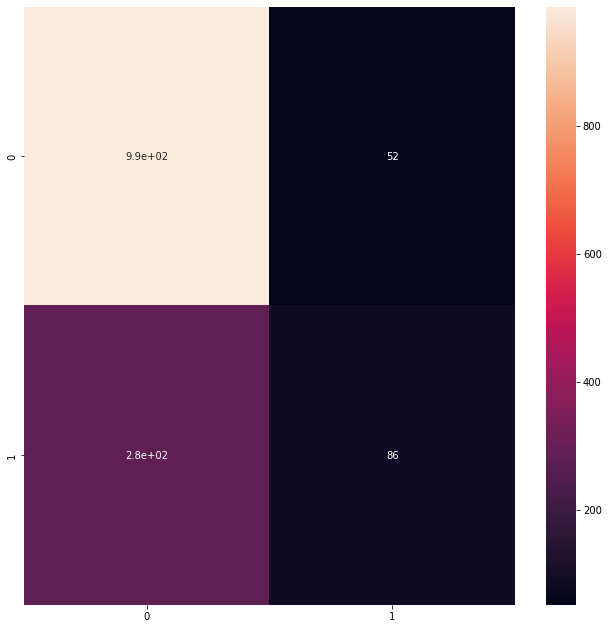

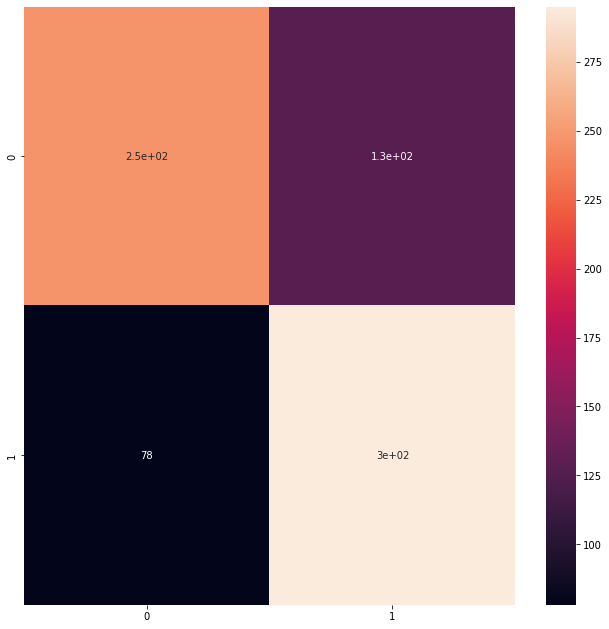

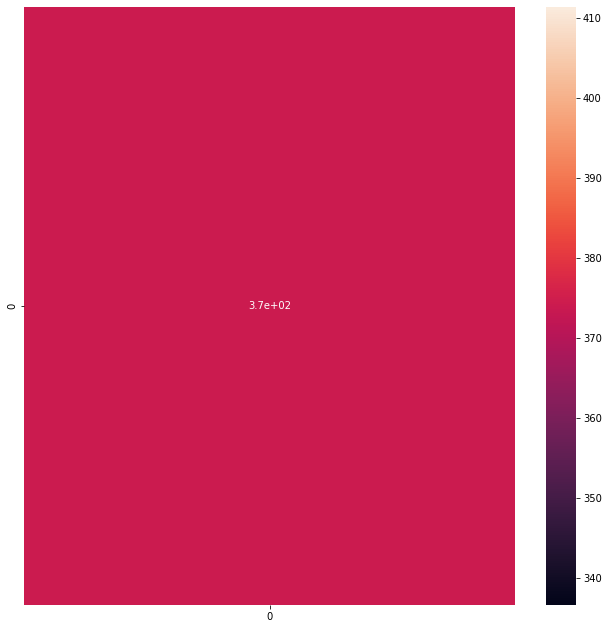

In [268]:
#ensemble method get 3 times by divide it ree parts ( churn =0   1869)
dfchurn0 =df[df['Churn']==0]
dfchurn1 =df[df['Churn']==1]

for i in range(3) :
  if i == 1 :
   dfchurn0 =dfchurn0[:1869]
  elif i == 2 :
   dfchurn0 =dfchurn0[1869:3750]
  elif i == 3 :
   dfchurn0 =dfchurn0[3750:]  

  underSample_df = pd.concat([dfchurn0,dfchurn1])


  dfx= underSample_df.drop('Churn',axis=1)
  dfy =underSample_df['Churn']
  X,x,Y,y =train_test_split(dfx,dfy,train_size=0.8)

  ANN(X,Y,x,y,100,-1)